In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

Epoch 1/12
469/469 - 2s - loss: 0.2350 - accuracy: 0.9285 - val_loss: 0.0503 - val_accuracy: 0.9832
Epoch 2/12
469/469 - 2s - loss: 0.0851 - accuracy: 0.9742 - val_loss: 0.0386 - val_accuracy: 0.9872
Epoch 3/12
469/469 - 2s - loss: 0.0634 - accuracy: 0.9803 - val_loss: 0.0335 - val_accuracy: 0.9887
Epoch 4/12
469/469 - 2s - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 5/12
469/469 - 2s - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0265 - val_accuracy: 0.9909
Epoch 6/12
469/469 - 2s - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 7/12
469/469 - 2s - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 8/12
469/469 - 2s - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0306 - val_accuracy: 0.9903
Epoch 9/12
469/469 - 2s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0285 - val_accuracy: 0.9918
Epoch 10/12
469/469 - 2s - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0272 - val_accuracy: 0.9919

9 → 5


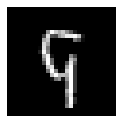

9 → 4


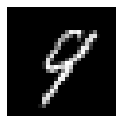

2 → 7


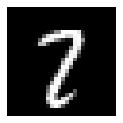

5 → 3


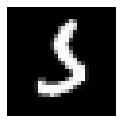

9 → 4


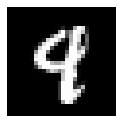

6 → 0


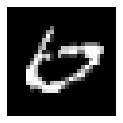

8 → 2


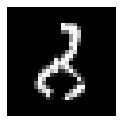

9 → 7


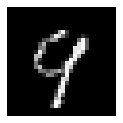

8 → 9


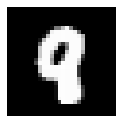

6 → 5


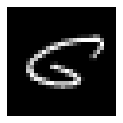

7 → 3


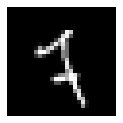

4 → 6


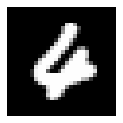

6 → 5


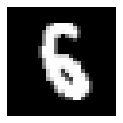

7 → 2


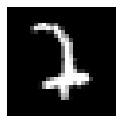

9 → 4


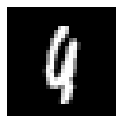

4 → 9


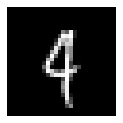

9 → 5


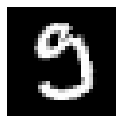

5 → 3


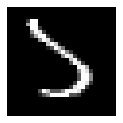

2 → 3


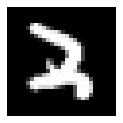

8 → 7


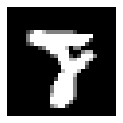

0 → 6


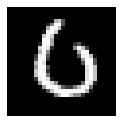

9 → 5


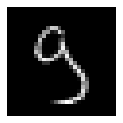

2 → 7


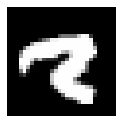

8 → 3


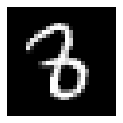

9 → 4


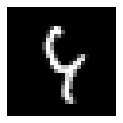

5 → 3


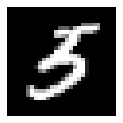

7 → 9


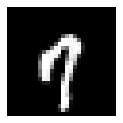

6 → 0


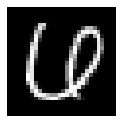

9 → 8


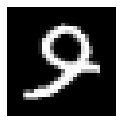

4 → 9


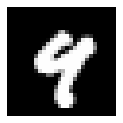

6 → 1


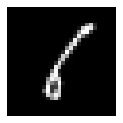

9 → 4


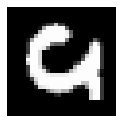

9 → 4


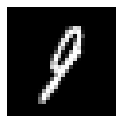

6 → 5


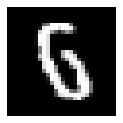

2 → 0


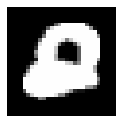

5 → 3


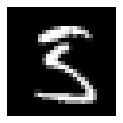

6 → 1


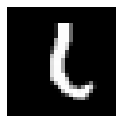

8 → 0


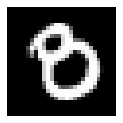

3 → 2


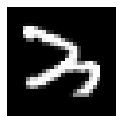

9 → 5


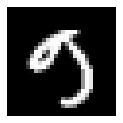

3 → 5


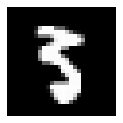

9 → 7


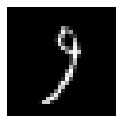

1 → 2


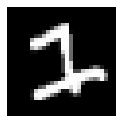

7 → 9


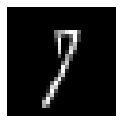

9 → 1


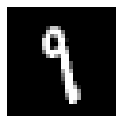

6 → 4


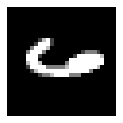

5 → 2


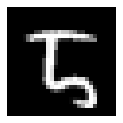

7 → 8


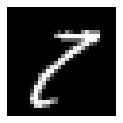

9 → 4


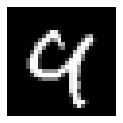

6 → 8


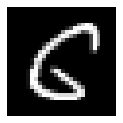

1 → 3


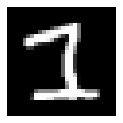

4 → 6


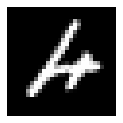

9 → 5


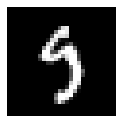

9 → 4


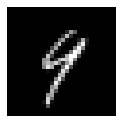

8 → 2


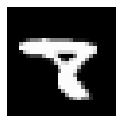

6 → 5


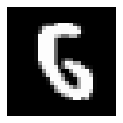

8 → 9


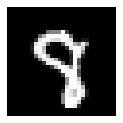

3 → 5


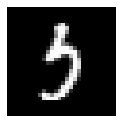

9 → 8


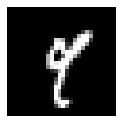

9 → 4


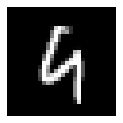

6 → 5


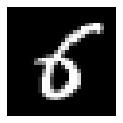

8 → 4


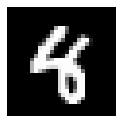

7 → 2


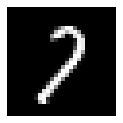

1 → 6


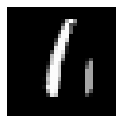

1 → 5


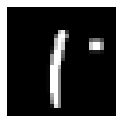

5 → 3


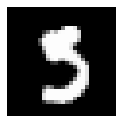

3 → 8


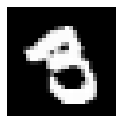

9 → 5


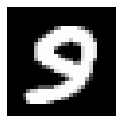

9 → 5


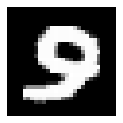

9 → 5


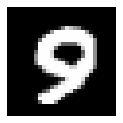

9 → 5


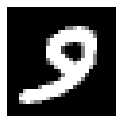

9 → 5


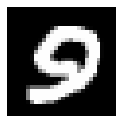

9 → 5


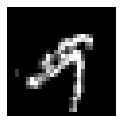

7 → 1


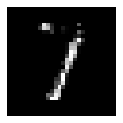

0 → 7


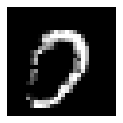

8 → 2


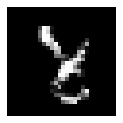

0 → 6


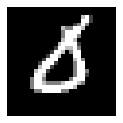

7 → 2


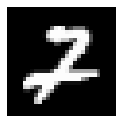

7 → 2


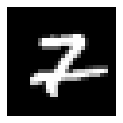

9 → 8


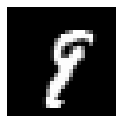

9 → 4


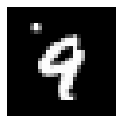

6 → 5


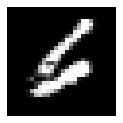

9 → 7


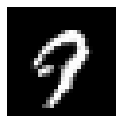

9 → 7


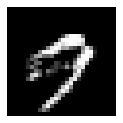

2 → 7


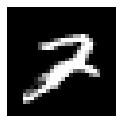

6 → 1


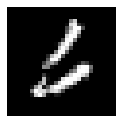

9 → 7


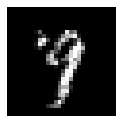

5 → 6


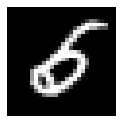

2 → 7


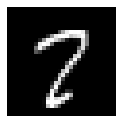

In [19]:
#수정한 코드
test_sample_n=10000

#전체를 predict
pred=cnn.predict(x_test) #(10000,10)

#예측한 레이블을 1차원 배열로 표현
pred_result=list(range(test_sample_n))
for i in range(test_sample_n):
    for j in range(10):
        if pred[i,j]==np.max(pred[i,:]):
            pred_result[i]=j
#pred_result=np.argmax(pred,axis=1)

#정답 레이블을 1차원 배열로 표현
test_label=np.argmax(y_test,axis=1) #y_test.shape (10000,10)

#비교 후 필요한 것을 출력
for i in range(test_sample_n):
    if test_label[i]!=pred_result[i]:
        #레이블 표현
        print(test_label[i],"→",pred_result[i])
        #이미지
        plt.figure(figsize=(2,2))
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        plt.axis('off')
        plt.show()

In [3]:
"""
# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()
"""

'\n# 신경망 모델 정확률 평가\nres=cnn.evaluate(x_test,y_test,verbose=0)\nprint("정확률은",res[1]*100)\n\nimport matplotlib.pyplot as plt\n\n# 정확률 그래프\nplt.plot(hist.history[\'accuracy\'])\nplt.plot(hist.history[\'val_accuracy\'])\nplt.title(\'Model accuracy\')\nplt.ylabel(\'Accuracy\')\nplt.xlabel(\'Epoch\')\nplt.legend([\'Train\',\'Validation\'], loc=\'best\')\nplt.grid()\nplt.show()\n\n# 손실 함수 그래프\nplt.plot(hist.history[\'loss\'])\nplt.plot(hist.history[\'val_loss\'])\nplt.title(\'Model loss\')\nplt.ylabel(\'Loss\')\nplt.xlabel(\'Epoch\')\nplt.legend([\'Train\',\'Validation\'], loc=\'best\')\nplt.grid()\nplt.show()\n'

SGD: 0.8464333176612854
Adam: 0.9299833297729492
Adagrad: 0.7983166694641113
RMSprop: 0.9289999961853027


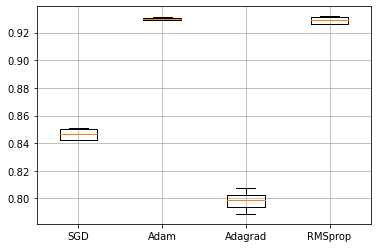

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,RMSprop
from sklearn.model_selection import KFold

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
def build_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    return model

# 하이퍼 파라미터
batch_siz=256
n_epoch=20
k=5

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train):
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]
        cnn=build_model()
        cnn.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd=cross_validation(SGD())
acc_adam=cross_validation(Adam())
acc_adagrad=cross_validation(Adagrad())
acc_rmsprop=cross_validation(RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt

# 네 옵티마이저의 정확률을 박스플롯으로 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)
Epoch 1/100
391/391 - 3s - loss: 1.7838 - accuracy: 0.3506 - val_loss: 1.4587 - val_accuracy: 0.4789
Epoch 2/100
391/391 - 2s - loss: 1.4631 - accuracy: 0.4744 - val_loss: 1.3489 - val_accuracy: 0.5196
Epoch 3/100
391/391 - 2s - loss: 1.3486 - accuracy: 0.5213 - val_loss: 1.2493 - val_accuracy: 0.5500
Epoch 4/100
391/391 - 2s - loss: 1.2570 - accuracy: 0.5510 - val_loss: 1.1471 - val_accuracy: 0.5897
Epoch 5/100
391/391 - 2s - loss: 1.1957 - accuracy: 0.5764 - val_loss: 1.1138 - val_accuracy: 0.6001
Epoch 6/100
391/391 - 2s - loss: 1.1479 - accuracy: 0.5951 - val_loss: 1.0818 - val_accuracy: 0.6126
Epoch 7/100
391/391 - 2s - loss: 1.1016 - accuracy: 0.6150 - val_loss: 1.0790 - val_accuracy: 0.6095
Epoch 8/100
391/391 - 2s - loss: 1.0656 - accuracy: 0.6222 - val_loss: 1.0343 - val_accuracy: 0.6319
Epoch 9/100
391/391 - 2s - loss: 1.0393 - accuracy: 0.6336 - val_los

Epoch 81/100
391/391 - 2s - loss: 0.5743 - accuracy: 0.7927 - val_loss: 0.9563 - val_accuracy: 0.6941
Epoch 82/100
391/391 - 2s - loss: 0.5687 - accuracy: 0.7953 - val_loss: 0.9719 - val_accuracy: 0.6886
Epoch 83/100
391/391 - 2s - loss: 0.5655 - accuracy: 0.7979 - val_loss: 1.0007 - val_accuracy: 0.6867
Epoch 84/100
391/391 - 2s - loss: 0.5590 - accuracy: 0.8000 - val_loss: 0.9767 - val_accuracy: 0.6963
Epoch 85/100
391/391 - 2s - loss: 0.5624 - accuracy: 0.7966 - val_loss: 0.9826 - val_accuracy: 0.6928
Epoch 86/100
391/391 - 2s - loss: 0.5605 - accuracy: 0.7990 - val_loss: 1.0008 - val_accuracy: 0.6900
Epoch 87/100
391/391 - 2s - loss: 0.5594 - accuracy: 0.7995 - val_loss: 0.9662 - val_accuracy: 0.6907
Epoch 88/100
391/391 - 2s - loss: 0.5501 - accuracy: 0.8027 - val_loss: 0.9986 - val_accuracy: 0.6859
Epoch 89/100
391/391 - 2s - loss: 0.5580 - accuracy: 0.7992 - val_loss: 0.9838 - val_accuracy: 0.6908
Epoch 90/100
391/391 - 2s - loss: 0.5563 - accuracy: 0.7998 - val_loss: 0.9837 - v

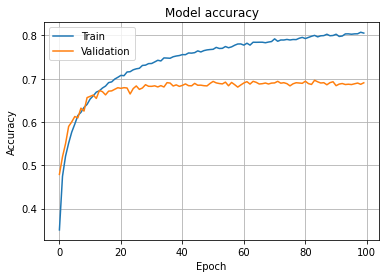

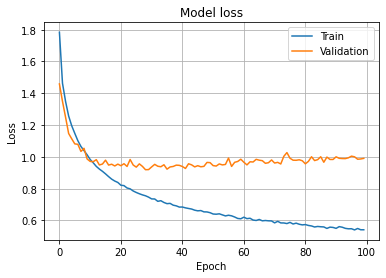

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

from six.moves import cPickle as pickle
import os
import platform
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

%matplotlib inline


img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
def get_CIFAR10_data(num_training=50000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, x_test, y_test


# Invoke the above function to get our data.
x_train, y_train, x_test, y_test = get_CIFAR10_data()

x_train=x_train.reshape(50000,32,32,3)
x_test=x_test.reshape(10000,32,32,3)
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

Epoch 1/30
391/391 - 2s - loss: 1.6333 - accuracy: 0.4189 - val_loss: 1.3147 - val_accuracy: 0.5398
Epoch 2/30
391/391 - 2s - loss: 1.3088 - accuracy: 0.5400 - val_loss: 1.1938 - val_accuracy: 0.5823
Epoch 3/30
391/391 - 2s - loss: 1.1817 - accuracy: 0.5826 - val_loss: 1.0952 - val_accuracy: 0.6146
Epoch 4/30
391/391 - 2s - loss: 1.0874 - accuracy: 0.6194 - val_loss: 1.0454 - val_accuracy: 0.6345
Epoch 5/30
391/391 - 2s - loss: 1.0154 - accuracy: 0.6452 - val_loss: 1.0300 - val_accuracy: 0.6440
Epoch 6/30
391/391 - 2s - loss: 0.9506 - accuracy: 0.6646 - val_loss: 1.0274 - val_accuracy: 0.6418
Epoch 7/30
391/391 - 2s - loss: 0.8870 - accuracy: 0.6887 - val_loss: 1.0019 - val_accuracy: 0.6532
Epoch 8/30
391/391 - 2s - loss: 0.8315 - accuracy: 0.7079 - val_loss: 0.9813 - val_accuracy: 0.6609
Epoch 9/30
391/391 - 2s - loss: 0.7700 - accuracy: 0.7292 - val_loss: 0.9748 - val_accuracy: 0.6631
Epoch 10/30
391/391 - 2s - loss: 0.7190 - accuracy: 0.7481 - val_loss: 0.9660 - val_accuracy: 0.6685

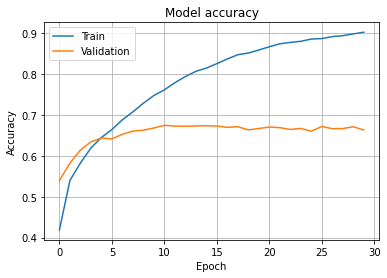

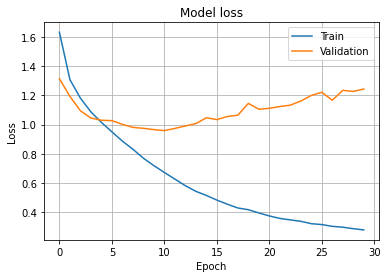

In [65]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

Epoch 1/30
391/391 - 2s - loss: 1.7715 - accuracy: 0.3555 - val_loss: 1.4792 - val_accuracy: 0.4786
Epoch 2/30
391/391 - 2s - loss: 1.4628 - accuracy: 0.4801 - val_loss: 1.3535 - val_accuracy: 0.5223
Epoch 3/30
391/391 - 2s - loss: 1.3559 - accuracy: 0.5186 - val_loss: 1.2363 - val_accuracy: 0.5629
Epoch 4/30
391/391 - 2s - loss: 1.2881 - accuracy: 0.5444 - val_loss: 1.1914 - val_accuracy: 0.5775
Epoch 5/30
391/391 - 2s - loss: 1.2319 - accuracy: 0.5674 - val_loss: 1.1499 - val_accuracy: 0.5935
Epoch 6/30
391/391 - 2s - loss: 1.1933 - accuracy: 0.5774 - val_loss: 1.1140 - val_accuracy: 0.6101
Epoch 7/30
391/391 - 2s - loss: 1.1567 - accuracy: 0.5919 - val_loss: 1.1200 - val_accuracy: 0.6034
Epoch 8/30
391/391 - 2s - loss: 1.1254 - accuracy: 0.6029 - val_loss: 1.0776 - val_accuracy: 0.6224
Epoch 9/30
391/391 - 2s - loss: 1.0923 - accuracy: 0.6140 - val_loss: 1.0349 - val_accuracy: 0.6401
Epoch 10/30
391/391 - 2s - loss: 1.0733 - accuracy: 0.6217 - val_loss: 1.0335 - val_accuracy: 0.6380

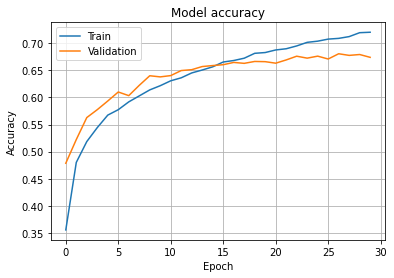

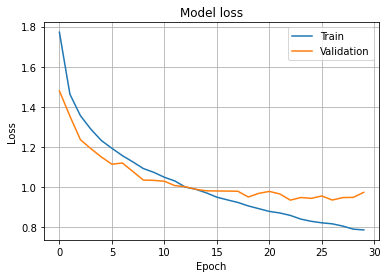

In [66]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

In [71]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(Conv2D(128,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_80/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

Epoch 1/30
469/469 - 2s - loss: 0.2289 - accuracy: 0.9264 - val_loss: 0.0388 - val_accuracy: 0.9864
Epoch 2/30
469/469 - 2s - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0363 - val_accuracy: 0.9876
Epoch 3/30
469/469 - 2s - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 4/30
469/469 - 2s - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0213 - val_accuracy: 0.9927
Epoch 5/30
469/469 - 2s - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0182 - val_accuracy: 0.9941
Epoch 6/30
469/469 - 2s - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0209 - val_accuracy: 0.9926
Epoch 7/30
469/469 - 2s - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0223 - val_accuracy: 0.9928
Epoch 8/30
469/469 - 2s - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0176 - val_accuracy: 0.9941
Epoch 9/30
469/469 - 2s - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0173 - val_accuracy: 0.9943
Epoch 10/30
469/469 - 2s - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0204 - val_accuracy: 0.9939

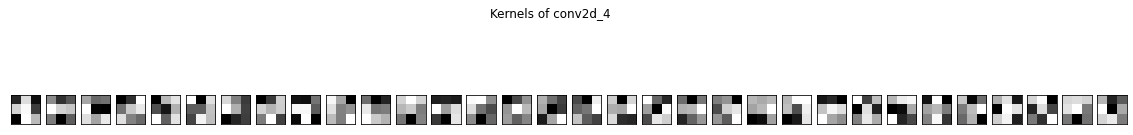

conv2d_28 (None, 26, 26, 32)
conv2d_29 (None, 24, 24, 32)
conv2d_30 (None, 10, 10, 64)
conv2d_31 (None, 8, 8, 64)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


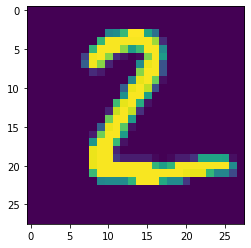

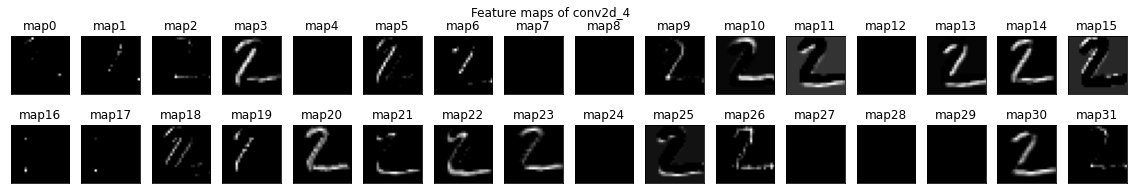

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    plt.subplot(1,n_kernel,i+1)
    plt.imshow(f[:,:],cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

Epoch 1/12
469/469 - 2s - loss: 0.2511 - accuracy: 0.9235 - val_loss: 0.0528 - val_accuracy: 0.9827
Epoch 2/12
469/469 - 2s - loss: 0.0903 - accuracy: 0.9727 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 3/12
469/469 - 2s - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0303 - val_accuracy: 0.9897
Epoch 4/12
469/469 - 2s - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 5/12
469/469 - 2s - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0319 - val_accuracy: 0.9895
Epoch 6/12
469/469 - 2s - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 7/12
469/469 - 2s - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0294 - val_accuracy: 0.9912
Epoch 8/12
469/469 - 2s - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.0266 - val_accuracy: 0.9917
Epoch 9/12
469/469 - 2s - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0306 - val_accuracy: 0.9908
Epoch 10/12
469/469 - 2s - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0285 - val_accuracy: 0.9918

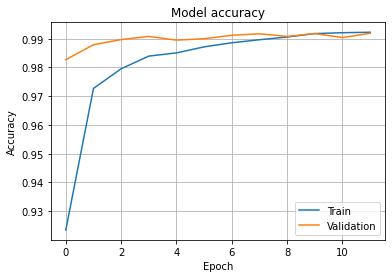

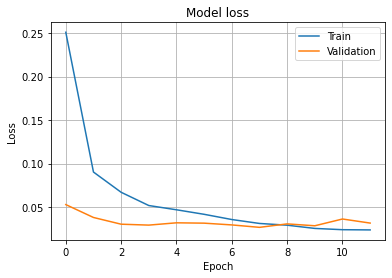

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 9s - loss: 0.6848 - accuracy: 0.7710 - val_loss: 0.1332 - val_accuracy: 0.9585
Epoch 2/30
469/469 - 9s - loss: 0.3433 - accuracy: 0.8918 - val_loss: 0.0919 - val_accuracy: 0.9699
Epoch 3/30
469/469 - 9s - loss: 0.2766 - accuracy: 0.9153 - val_loss: 0.0731 - val_accuracy: 0.9754
Epoch 4/30
469/469 - 9s - loss: 0.2453 - accuracy: 0.9236 - val_loss: 0.0677 - val_accuracy: 0.9766
Epoch 5/30
469/469 - 9s - loss: 0.2157 - accuracy: 0.9345 - val_loss: 0.0653 - val_accuracy: 0.9790
Epoch 6/30
469/469 - 9s - loss: 0.1963 - accuracy: 0.9404 - val_loss: 0.0600 - val_accuracy: 0.9797
Epoch 7/30
469/469 - 9s - loss: 0.1836 - accuracy: 0.9443 - val_loss: 0.0559 - val_accuracy: 0.9816
Epoch 8/30
469/469 - 9s - loss: 0.1705 - accuracy: 0.9487 - val_loss: 0.0540 - val_accuracy: 0.9828
Epoch 9/30
469/469 - 9s - loss: 0.1593 - accuracy: 0.9518 - val_loss: 0.0495 - val_accuracy: 0.9833
Epoch 10/30
469/469 - 9s - loss: 0.1545 - accuracy: 0.9538 - val_loss: 0.0519 - val_accuracy: 0.9832

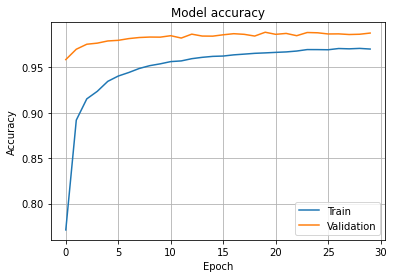

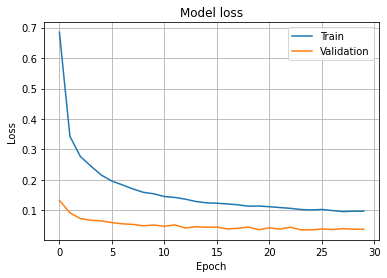

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=128),epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()